In [1]:
import ctypes
import cupy

gmm = ctypes.cdll.LoadLibrary('./build/libgmm.so')
# 设置参数类型
gmm.gmmFit.argtypes = [
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_int
]

# # 生成 2 个三维高斯分布的数据
# dist1_mean = cupy.array([-1, 1, -1], dtype=cupy.float64)
# dist1_covar = cupy.array(
#     [[ 3, -2,  0],
#     [-2,  2,  0],
#     [ 0,  0,  2]]
# , dtype=cupy.float64)
# dist1_data = cupy.random.multivariate_normal(dist1_mean, dist1_covar, size=7000)

# dist2_mean = cupy.array([2, -1.5, 3], dtype=cupy.float64)
# dist2_covar = cupy.array(
#     [[ 3,  1, -5],
#     [ 1,  1, -1],
#     [-5, -1, 10]]
# , dtype=cupy.float64)
# dist2_data = cupy.random.multivariate_normal(dist2_mean, dist2_covar, size=3000)

# # 权重是 7:3
# data = cupy.concatenate([dist1_data, dist2_data])
# cupy.random.shuffle(data)

# weights = cupy.empty(2, dtype=cupy.float64)
# means = cupy.empty((2, 3), dtype=cupy.float64)
# covariances = cupy.empty((2, 3, 3), dtype=cupy.float64)

# gmm.gmmFit(
#     ctypes.cast(data.data.ptr, ctypes.POINTER(ctypes.c_double)),
#     ctypes.cast(weights.data.ptr, ctypes.POINTER(ctypes.c_double)),
#     ctypes.cast(means.data.ptr, ctypes.POINTER(ctypes.c_double)),
#     ctypes.cast(covariances.data.ptr, ctypes.POINTER(ctypes.c_double)),
#     data.shape[0],
#     data.shape[1],
#     2,
#     1e-6,
#     300
# )

# print('weights:\n', weights)
# print('means:\n', means)
# print('covariances:\n', covariances)

data = cupy.load('data/train-images.npy') / 255
cupy.random.shuffle(data)
print(data.shape)

weights = cupy.empty(10, dtype=cupy.float64)
means = cupy.empty((10, 784), dtype=cupy.float64)
covariances = cupy.empty((10, 784, 784), dtype=cupy.float64)

gmm.gmmFit(
    ctypes.cast(data.data.ptr, ctypes.POINTER(ctypes.c_double)),
    ctypes.cast(weights.data.ptr, ctypes.POINTER(ctypes.c_double)),
    ctypes.cast(means.data.ptr, ctypes.POINTER(ctypes.c_double)),
    ctypes.cast(covariances.data.ptr, ctypes.POINTER(ctypes.c_double)),
    data.shape[0],
    data.shape[1],
    10,
    1e-6,
    300
)

(60000, 784)


0

In [11]:
means = means.get() # turn cupy into numpy

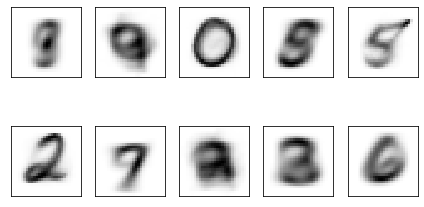

In [12]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(nrows=2, ncols=5, sharex='all', sharey='all')
ax = ax.flatten()
for i in range(10):
    img = means[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()